In [1]:
%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

CPU times: total: 0 ns
Wall time: 0 ns


In [2]:
file = 'dataset/owid-covid-data.csv'
df = pd.read_csv(file)

In [12]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323661 entries, 0 to 323660
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    323661 non-null  object 
 1   continent                                   308301 non-null  object 
 2   location                                    323661 non-null  object 
 3   date                                        323661 non-null  object 
 4   total_cases                                 286549 non-null  float64
 5   new_cases                                   314782 non-null  float64
 6   new_cases_smoothed                          313523 non-null  float64
 7   total_deaths                                265511 non-null  float64
 8   new_deaths                                  314824 non-null  float64
 9   new_deaths_smoothed                         313594 non-null  float64
 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [13]:
for columns in df:
    print('{} - Unique: {} - Null: {} - Na: {}'.format(columns, 
                                   df[columns].unique().shape[0],
                                   df[columns].isnull().shape[0], 
                                   df[columns].isna().shape[0]
                                   ))

iso_code - Unique: 255 - Null: 323661 - Na: 323661
continent - Unique: 7 - Null: 323661 - Na: 323661
location - Unique: 255 - Null: 323661 - Na: 323661
date - Unique: 1282 - Null: 323661 - Na: 323661
total_cases - Unique: 131688 - Null: 323661 - Na: 323661
new_cases - Unique: 27699 - Null: 323661 - Na: 323661
new_cases_smoothed - Unique: 49483 - Null: 323661 - Na: 323661
total_deaths - Unique: 50672 - Null: 323661 - Na: 323661
new_deaths - Unique: 4659 - Null: 323661 - Na: 323661
new_deaths_smoothed - Unique: 11750 - Null: 323661 - Na: 323661
total_cases_per_million - Unique: 171606 - Null: 323661 - Na: 323661
new_cases_per_million - Unique: 82311 - Null: 323661 - Na: 323661
new_cases_smoothed_per_million - Unique: 95241 - Null: 323661 - Na: 323661
total_deaths_per_million - Unique: 102028 - Null: 323661 - Na: 323661
new_deaths_per_million - Unique: 9843 - Null: 323661 - Na: 323661
new_deaths_smoothed_per_million - Unique: 10572 - Null: 323661 - Na: 323661
reproduction_rate - Unique: 3

Starting to check number of check death/new case per continent

In [48]:
print('Period: {} to {}'.format(df['date'].min(),df['date'].max()))

continents = []
total_cases = []
total_deaths = []

for i in df['continent'].unique():
    dff = df.set_index('continent')
    # dff['total_cases'] = dff['total_cases'].astype(int)
    # dff['total_deaths'] = dff['total_deaths'].astype(int)
    continents.append(i)
    total_cases.append(dff.loc[i]['total_cases'].max().astype(int))
    total_deaths.append(dff.loc[i]['total_deaths'].max().astype(int))

Period: 2020-01-01 to 2023-07-05


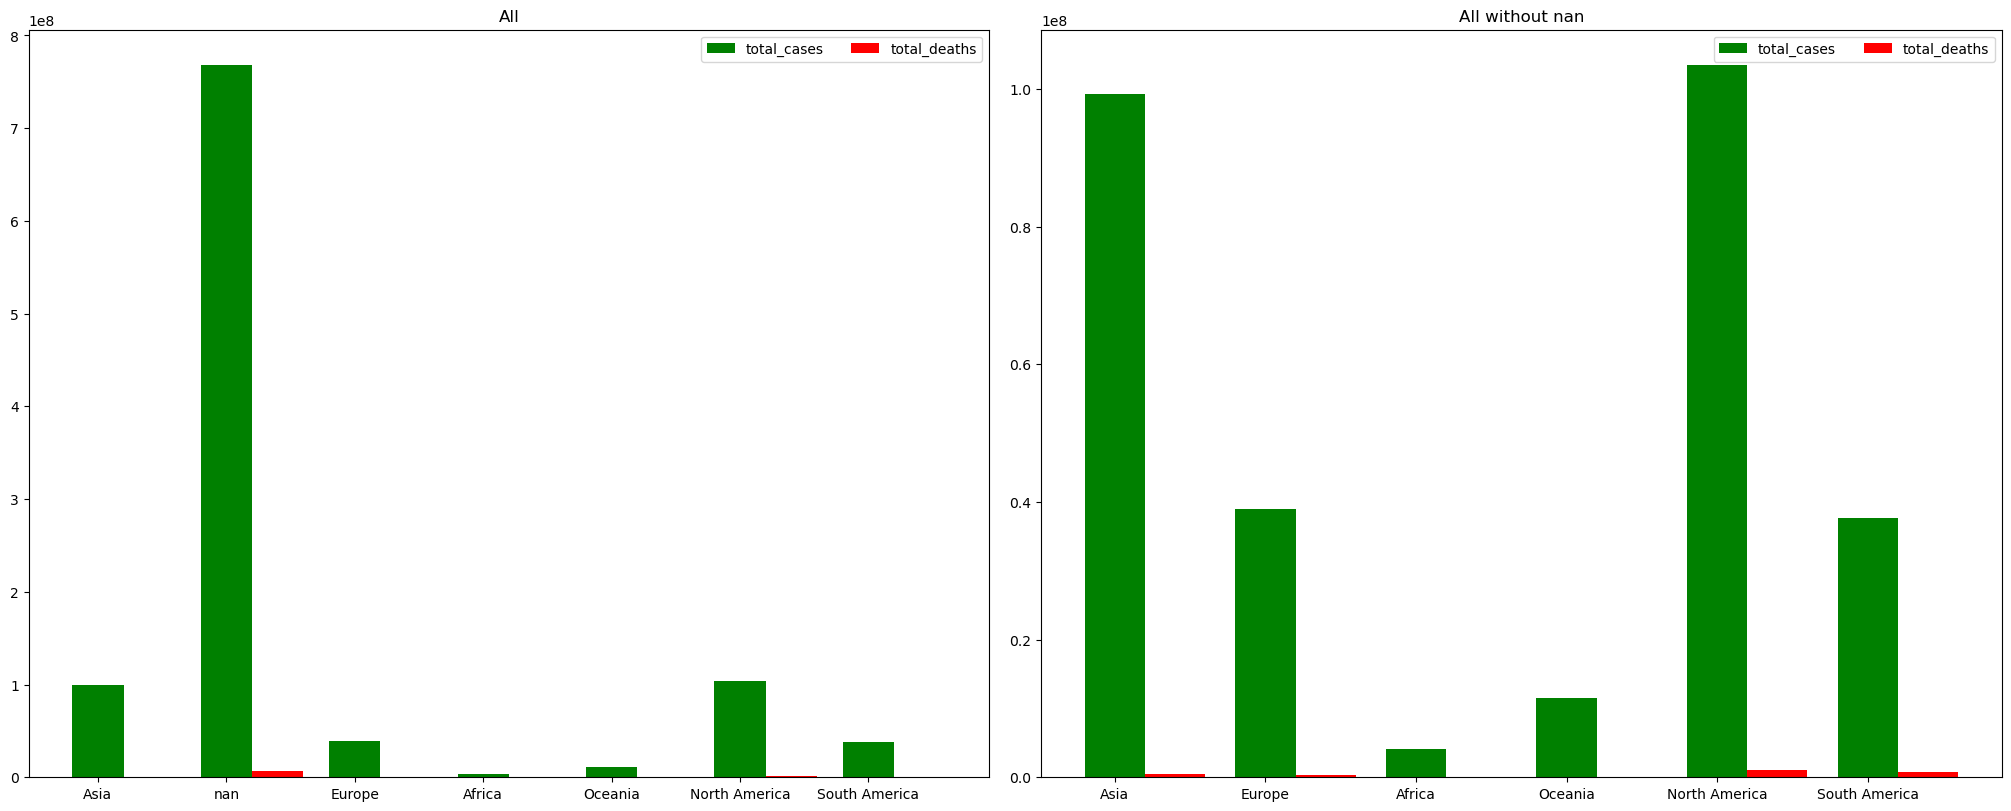

In [49]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100

x = np.arange(len(continents))
fig, (a1, a2) = plt.subplots(1,2,layout='constrained')
a1.bar(x, total_cases, color='green', align='center', width=0.4, label='total_cases')
a1.bar(x + 0.4, total_deaths, color='red', align='center', width=0.4, label='total_deaths')
a1.set_xticks(x, continents)
a1.legend(loc='upper right', ncols=2)
a1.set_title('All')

continents.pop(1)
total_cases.pop(1)
total_deaths.pop(1)
x = np.arange(len(continents))
a2.bar(x, total_cases, color='green', align='center', width=0.4, label='total_cases')
a2.bar(x + 0.4, total_deaths, color='red', align='center', width=0.4, label='total_deaths')
a2.set_xticks(x, continents)
a2.legend(loc='upper right', ncols=2)
a2.set_title('All without nan')
plt.show()

If excluding nan continent, NA and SA have both the highest deaths and are "competing" with Asia and Europe on total of cases.
Will check what's the value of of nan continent next.

In [79]:
dff = df.set_index('continent')
df['continent'].unique()
temp = df.loc[df['continent'].isna()]
temp = temp.set_index('location')
print(df.loc[df['continent'].isna()]['location'].unique())
temp.loc['Low income'].head(2)

['Africa' 'Asia' 'Europe' 'European Union' 'High income' 'Low income'
 'Lower middle income' 'North America' 'Oceania' 'South America'
 'Upper middle income' 'World']


,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
location,,,,,,,,,,,,,,,,,,,,,
Low income,OWID_LIC,NaN,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,737604900.0,NaN,NaN,NaN,NaN
Low income,OWID_LIC,NaN,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,737604900.0,NaN,NaN,NaN,NaN


Nan in continent correspond to iso_code of OWID_xxx some are continent's ISO Code and some like "low income" are not known.
These rows are not giving incremental or total data but only static population, and those specific data can be extensively found using the "continent" column.

In [86]:
temp = df.set_index('date')
temp = temp.loc['2020-01-03']
temp = temp.set_index('continent')
temp.loc['Africa']['population']

continent
Africa     44903228.0
Africa     35588996.0
Africa     13352864.0
Africa      2630300.0
Africa     22673764.0
Africa     12889583.0
Africa     27914542.0
Africa       593162.0
Africa      5579148.0
Africa     17723312.0
Africa       836783.0
Africa      5970430.0
Africa     28160548.0
Africa     99010216.0
Africa      1120851.0
Africa    110990096.0
Africa      1674916.0
Africa      3684041.0
Africa      1201680.0
Africa    123379928.0
Africa      2388997.0
Africa      2705995.0
Africa     33475870.0
Africa     13859349.0
Africa      2105580.0
Africa     54027484.0
Africa      2305826.0
Africa      5302690.0
Africa      6812344.0
Africa     29611718.0
Africa     20405318.0
Africa     22593598.0
Africa      4736146.0
Africa      1299478.0
Africa       326113.0
Africa     37457976.0
Africa     32969520.0
Africa      2567024.0
Africa     26207982.0
Africa    218541216.0
Africa       974062.0
Africa     13776702.0
Africa         5401.0
Africa       227393.0
Africa     17316452.0


array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)